In [1]:
import numpy as np 
import pandas as pd
import textwrap
from utils import *

pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv('./datasets/public_train.csv', encoding='utf-8')
data

id                         user_name  \
0        1  389c669730cb6c54314a46be785cea42   
1        2  775baa6d037b6d359b229a656eaeaf08   
2        3  b9f3394d2aff86d85974f5040c401f08   
3        4  808e278b22ec6b96f2faf7447d10cd8e   
4        5  f81bdd6d8be4c5f64bb664214e47aced   
...    ...                               ...   
4367  4368  20933f35ef5d22b4d8193cc269c8ff1e   
4368  4369  a117312f796a22e364b8e241b8cb91eb   
4369  4370  547ba1b4f95ec07f2cdada24a6eec693   
4370  4371  acb4a36d6247a0c89dac880725b2b3a0   
4371  4372  3deabd01107da8ae2a29ca03483714d1   

                                           post_message timestamp_post  \
0     THƒÇNG C·∫§P B·∫¨C H√ÄM ƒê·ªêI V·ªöI 2 C√ÅN B·ªò, CHI·∫æN S·ª∏ H...     1585945439   
1                                                 <URL>   1588939166.0   
2     T∆Ø V·∫§N M√ôA THI: C√°ch n·ªôp h·ªì s∆° ƒë·ªÉ tr√∫ng tuy·ªÉn ...     1591405213   
3     C∆° quan C·∫°nh tranh v√† Th·ªã tr∆∞·ªùng Anh quy·∫øt ƒë·ªãn...     1592023613   
4     Th√™m 7 ca t·∫°i Qu·∫£ng Nam li√™n quan ƒë·∫øn h√†nh kh√°...     1583737358   
...                                                 ...            ...   
4367  B√Ä M·∫∏ VI·ªÜT NAM ANH H√ôNG 95 TU·ªîI MAY KH·∫®U TRANG...   1584795126.0   
4368  Ngu·ªìn cung khan ki·∫øm nh∆∞ng nhu c·∫ßu cao t·∫°o √°p ...     1590645643   
4369  L·ªùi c·∫£nh t·ªânh cho c√°c thanh ni√™n d√¢n T·ªî...t·ªëc ...   1589774421.0   
4370  ƒê·∫øn b√¢y gi·ªù m·ªõi bi·∫øt ch·ªâ c·∫ßn h·ªçc l√°i xe h·∫°ng B...   1589551407.0   
4371  T∆∞ l·ªánh ng√†nh c·∫•m bay v·ªõi phi c√¥ng Pakistan, r...   1593319282.0   

     num_like_post num_comment_post num_share_post  label  
0            19477              378          173.0      0  
1               11                5              3      0  
2               48                5           19.0      0  
3                3                0            0.0      0  
4              775                0           54.0      0  
...            ...              ...            ...    ...  
4367          5800             1300          12000      0  
4368            21                1            NaN      0  
4369             3                1            NaN      1  
4370           144               38             87      1  
4371            24                9            NaN      0  

[4372 rows x 8 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4372 non-null   int64 
 1   user_name         4372 non-null   object
 2   post_message      4371 non-null   object
 3   timestamp_post    4276 non-null   object
 4   num_like_post     4257 non-null   object
 5   num_comment_post  4362 non-null   object
 6   num_share_post    3647 non-null   object
 7   label             4372 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 273.4+ KB


In [5]:
len(data.user_name.unique())

3233

In [4]:
pd.set_option('display.max_rows', None)
index = []
for i in range(len(data)):
    try:
        int(float(data.num_comment_post[i]))
        int(float(data.num_like_post[i]))
        int(float(data.num_share_post[i]))
    except:
        index.append(i)
data_temp = data.iloc[index,:]
print(len(data_temp))
data_temp

841


13                                                  3   
3219                                                  1   
3220                                                  6   
3222                                                  8   
3224                                                 11   
3226                                            unknown   
3234                                                  2   
3239                                                  2   
3241                                                  1   
3242                                                  1   
3246                                                  2   
3250                                                  9   
3260                                                  3   
3265                                                  2   
3267                                                  8   
3286                                                 10   
3287                                                 27   
3288                                                  4   
3294                                                  7   
3298                                                  6   
3302                                                NaN   
3306                                            unknown   
3310                                                  3   
3318                                                 25   
3320                                                NaN   
3328                                                  2   
3329                                                NaN   
3330                                                  1   
3347                                                NaN   
3350                                                  2   
3351                                                  4   
3353                                                 35   
3356                                                  3   
3358                                            unknown   
3363                                                  9   
3370                                                NaN   
3375                                                  7   
3381                                            unknown   
3383                                                  1   
3387                                                  3   
3393                                                  9   
3401                                                  3   
3403                                                  8   
3405                                                 23   
3406                                                  7   
3409                                                  1   
3417                                                  2   
3422                                                  1   
3424                                                  4   
3440                                                 35   
3444                                                  1   
3447                                                  2   
3449                                                 11   
3451                                                NaN   
3457                                                 37   
3465                                                  2   
3472                                                  1   
3478                                                 14   
3485                                                  4   
3486                                                 24   
3490   Th·∫ø gi·ªõi ƒë·∫©y nhanh t·ªëc ƒë·ªô ph√°t tri·ªÉn vaccine ...   
3495                                                 11   
3500                                                  4   
3510                                                  5   
3521                                                  4   
3527                                                 17   
3533                                                  4   
3538                              

In [ ]:
index = []
for i in range(len(data)):
    try:
        int(float(data.num_comment_post[i]))
        int(float(data.num_like_post[i]))
        int(float(data.num_share_post[i]))
    except:
        index.append(i)
data_temp = data.iloc[index,:]

In [3]:
for i in range(len(data)):
    text = data.iat[i,2]
    like = data.iat[i,4]
    comment = data.iat[i,5]
    share = data.iat[i,6]
    label = convert_label_to_text(data.iat[i,7])
    print(f'Example {i}, label: {label}, n_comment: {comment}, n_share: {share}', '\n')
    print(text)
    print('-'*170)

 v√¨ b·ªánh nh√¢n 34 | B·∫£n tin v·ªÅ virus corona ng√†y 14.3.2020

B·∫£n tin v·ªÅ virus corona c·ªßa B√°o Thanh Ni√™n tr·ª±c ti·∫øp l√∫c 19 gi·ªù tr√™n <URL>, k√™nh YouTube B√°o Thanh Ni√™n, facebook B√°o Thanh Ni√™n v√† trang B√°o Thanh Ni√™n tr√™n m·∫°ng x√£ h·ªôi Lotus. Ng√†y 14.3.2020 c√≥ c√°c th√¥ng tin ƒë√°ng ch√∫ √Ω: Di·ªÖn bi·∫øn ph·ª©c t·∫°p v·ªÅ Covid-19 t·∫°i Vi·ªát Nam v√† th·∫ø gi·ªõi; Vi·ªát Nam ng·ª´ng nh·∫≠p c·∫£nh v·ªõi ng∆∞·ªùi ƒë·∫øn t·ª´ Anh v√† kh·ªëi Schengen; th·ª±c h∆∞ chuy·ªán b·ªánh nh√¢n th·ª© 21 c√≥ v·ª£ b√©, con ri√™ng‚Ä¶.
B·∫£n tin s·∫Ω k·∫øt n·ªëi v·ªõi nh√† b√°o Tr·ªçng Kha - Tr∆∞·ªüng ban qu·ªëc t·∫ø B√°o Thanh Ni√™n - ƒëang c√≥ m·∫∑t t·∫°i Anh ƒë·ªÉ c√≥ th√™m th√¥ng tin v·ªÅ t√¨nh h√¨nh ƒë·∫°i d·ªãch Covid-19 ·ªü ch√¢u √¢u

#Covid19 #corona #viruscorona #vir√∫tcorona #nCoV #vi√™mph·ªïiV≈©H√°n     #B·∫£ntinCorona
---------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4372 non-null   int64 
 1   user_name         4372 non-null   object
 2   post_message      4371 non-null   object
 3   timestamp_post    4276 non-null   object
 4   num_like_post     4257 non-null   object
 5   num_comment_post  4362 non-null   object
 6   num_share_post    3647 non-null   object
 7   label             4372 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 273.4+ KB


In [5]:
# check post_message: duplicate
dup = data.duplicated(subset=['post_message'])
dup_data = data[dup].sort_values(by='post_message')

# take samples have unique post_message of duplicate
unique_data = dup_data.post_message.unique()

for content in unique_data:
    dup_content = data[['post_message', 'num_like_post', 'num_comment_post', 'num_share_post', 'label']][data.post_message == content]
    print(dup_content)
    print('*'*170)

print('END.')

                                           post_message num_like_post  \
506   "Con virus corona n√†y l√† m·ªôt th·∫£m h·ªça t∆∞∆°ng ƒë∆∞...            48   
3516  "Con virus corona n√†y l√† m·ªôt th·∫£m h·ªça t∆∞∆°ng ƒë∆∞...           214   

     num_comment_post num_share_post  label  
506                 6             74      0  
3516               19            474      1  
**************************************************************************************************************************************************************************
                                           post_message num_like_post  \
1288  "T√îI S√îÃÅNG ƒê√äÃâ K√äÃâ LAÃ£I!"  M·ªôt ng∆∞·ªùi s·ªëng s√≥t ...          1500   
3425  "T√îI S√îÃÅNG ƒê√äÃâ K√äÃâ LAÃ£I!"  M·ªôt ng∆∞·ªùi s·ªëng s√≥t ...          3700   

     num_comment_post num_share_post  label  
1288              541           2400      1  
3425             1000           2400      1  
*******************************************************

In [6]:
# check post_message: nan values
data[data.post_message.isna() == True]

id                         user_name post_message timestamp_post  \
2247  2248  66a74969be46766c182b99dc01740a11          NaN     1585331222   

     num_like_post num_comment_post num_share_post  label  
2247          9717               28           88.0      0

In [7]:
# check timestamp_post: nan values
data[data.timestamp_post.isna() == True]

id                         user_name  \
21      22  5eddcdd37c084d4528f89af39c1f4337   
142    143  93ea646ee2b3e4a11eb4e516b41efaba   
167    168  0f2bcbfdc6de2f21e68c0026a3a14441   
184    185  907f1fdcf852bedc51dfd6e11a81f273   
232    233  28a7bf4c68263f9d9068778ec3b8de93   
...    ...                               ...   
4195  4196  b2d8d985c06b203fed093e52008aa64f   
4223  4224  1e44dc26ec7db8eb95fe352ff385b2c5   
4257  4258  50d80468b93b3eaaa6f907f6d5274022   
4302  4303  c76936b0e080d87f5ea552844b158da1   
4342  4343  9fbef73ac633593a758264f1958fd64f   

                                           post_message timestamp_post  \
21    C·ª•c Qu·∫£n l√Ω s·∫£n ph·∫©m y t·∫ø qu·ªëc gia Trung Qu·ªëc ...            NaN   
142   D·ªãch Covid-19: Trung Qu·ªëc l·∫ßn ƒë·∫ßu th·ª´a nh·∫≠n c√≥...            NaN   
167   5 nƒÉm tr∆∞·ªõc, Bill Gates ƒë√£ c√¥ng khai c·∫£nh b√°o ...            NaN   
184   G·ª≠i ƒë·∫øn v·ªã "t∆∞·ªõng t∆∞ l·ªánh" trong cu·ªôc chi·∫øn ch...            NaN   
232   "Ch√∫ng ta c√°ch ly V≈© H√°n, nh∆∞ng ƒë·ª´ng c√°ch ly t...            NaN   
...                                                 ...            ...   
4195  PH√ÅT MI·ªÑN PH√ç H√ÄNG TRI·ªÜU KH·∫®U TRANG V·∫¢I ƒê·ªÇ NG∆Ø...            NaN   
4223  üáªüá≥üáªüá≥üáªüá≥üáªüá≥  'Vi·ªát Nam h·ª°i, Vi·ªát Nam ∆°i! C√πng ƒëo√†...            NaN   
4257  Moderna Therapetics, m·ªôt c√¥ng ty c√¥ng ngh·ªá sin...            NaN   
4302  Fang Bin, m·ªôt c∆∞ d√¢n V≈© H√°n, ƒë√£ b√≠ m·∫≠t g·∫Øn m√°y...            NaN   
4342  Virus Corona l√† v≈© kh√≠ sinh h·ªçc? Hi·ªán nay c√≥ n...            NaN   

     num_like_post num_comment_post num_share_post  label  
21            4700              549           3300      0  
142           9400              939           3400      1  
167           3700              277           4700      0  
184          10000              657           4700      0  
232          23000             1300           4800      0  
...            ...              ...            ...    ...  
4195          3000              974           4300      0  
4223          1100              109           2200      0  
4257         18000             1300          26000      0  
4302          4400              976           4400      1  
4342          4800              436           3100      1  

[96 rows x 8 columns]

In [8]:
# check num_like_post: nan
data[data.num_like_post.isna() == True]

id                         user_name  \
34      35  c664b20e64207d62260e0091a2b78131   
65      66  6fe4f053dffbad5149ce29aca2e5f091   
96      97  c9d730d98bd33bd2a39fcb16e8e906a7   
143    144  7a72024ce87b8c33f8fbc4ccebc22066   
148    149  10d7a832500d777fcd11bf3fc764efb4   
...    ...                               ...   
4134  4135  8543ecac6d484ef9a79c225b4894b3b6   
4189  4190  ad0e433f6dabc4e2cf32544d3bcbc9ee   
4194  4195  c658e3bbad6a24afc7cd0444978b5e13   
4253  4254  27c2320e8fc18a8045a37f758fb5f0b0   
4343  4344  2fbef5d41baed1398fd80b2b0abf7cc2   

                                           post_message timestamp_post  \
34    C√¥ng an <URL> c≈©ng cho bi·∫øt, bƒÉng nh√≥m n√†y m·∫∑c...   1591599074.0   
65    Tri·ªáu Qu√¢n S·ª± v∆∞·ª£t ng·ª•c ra sao?\nL·ª£i d·ª•ng c√°n ...   1592614936.0   
96    üîñ Ng∆∞·ªùi d√¢n b·ªã ·∫£nh h∆∞·ªüng b·ªüi d·ªãch Covid-19 ·ªü H...   1588007032.0   
143   **Th√™m m·ªôt v·ª• l·∫•y √Ω t∆∞·ªüng ng∆∞·ªùi kh√°c l√†m nghi√™...   1584342204.0   
148   Ng√†y 18/6, l√£nh ƒë·∫°o C·ª•c C·∫£nh s√°t ƒëi·ªÅu tra t·ªôi ...   1592537993.0   
...                                                 ...            ...   
4134  NH·ªÆNG N·ª§ C∆Ø·ªúI NH√ÇN B·∫¢N\n\nM·ªôt s√°ng ki·∫øn t∆∞·ªüng ...   1587459958.0   
4189  # **CH∆ØA KHI N√ÄO H·ªÜ TH·ªêNG Y T·∫æ N∆Ø·ªöC TA L·∫†I R∆†I...   1587357312.0   
4194  D·ª± √°n ho√†nh tr√°ng, k√©o d√†i qua 2 th·∫≠p k·ªâ nh∆∞ng...   1586975421.0   
4253  Gi·∫•y XN √¢m t√≠nh COVID-19 t·∫°i Anh c√≥ v·∫ª kh√¥ng x...   1588552076.0   
4343  B·∫Øt ƒë·∫ßu t·ª´ ng√†y 10/3, Vi·ªát Nam th·ª±c hi·ªán khai ...     1583807306   

     num_like_post num_comment_post num_share_post  label  
34             NaN                0            NaN      0  
65             NaN                0            NaN      0  
96             NaN                0            NaN      0  
143            NaN                0              0      0  
148            NaN                0            NaN      0  
...            ...              ...            ...    ...  
4134           NaN                0            NaN      0  
4189           NaN                0            NaN      0  
4194           NaN                0            NaN      0  
4253           NaN                0            NaN      0  
4343           NaN                5          147.0      0  

[115 rows x 8 columns]

In [9]:
# check num_commnet_post: nan
data[data.num_comment_post.isna() == True]

id                         user_name  \
520    521  7edc5e39f9557688aa6117324b7df2bd   
802    803  ca34a6c2dc462d734b3b89ba1c31bc1f   
809    810  bc47a28fc07551c1a22cb256d1a4a892   
821    822  512679af778f40361381b65d77ec72cd   
1071  1072  f3317e52aa79b261db534a38e7f7c360   
1688  1689  fbd83d88ba3c6b999f03e75ad695e75e   
2112  2113  512679af778f40361381b65d77ec72cd   
2360  2361  c35667034caf782d5714f03394e9e370   
2649  2650  6f00d1af0bebc972152914703cfdd56d   
3149  3150  806b43372f2676bc3beda402d8de60cb   

                                           post_message timestamp_post  \
520   C·ª®U DOANH NGHI·ªÜP "V∆Ø·ª¢T B√ÉO" COVID-19\n\nD·ªãch b...     1584299353   
802   M·ªôt Th·∫°c sƒ© ng∆∞·ªùi Vi·ªát Nam ƒëang l√†m vi·ªác t·∫°i B...   1581434097.0   
809   M·ªôt Th·∫°c sƒ© ng∆∞·ªùi Vi·ªát Nam ƒëang l√†m vi·ªác t·∫°i B...   1581263045.0   
821   M∆∞a l·ªõn di·ªán r·ªông t·∫°i B·∫Øc B·ªô, B·∫Øc Trung B·ªô t·ª´ ...     1590095701   
1071  H√îM NAY: TH√äM 2 B·ªÜNH NH√ÇN ƒê∆Ø·ª¢C C√îNG B·ªê KH·ªéI B·ªÜ...     1585629023   
1688  Nh·ªØng ph√°t ng√¥n ·∫•n t∆∞·ª£ng trong tu·∫ßn.\n\n#phatn...     1584226362   
2112    M·ª∏ K√™u G·ªçi Ng∆∞·ªùi D√¢n Kh√¥ng Ph·∫°m T·ªôi V√¨ Covid-19     1584559978   
2360  S·∫°ch 90% vi khu·∫©n ch·ªâ trong 15-20s üòéüòéüòé\nChi ti...     1584071962   
2649  TIN D·ªäCH B·ªÜNH DO VIRUS CORONA S√ÅNG 25/4\n\nNh·ªØ...     1587754760   
3149  L·ªÑ TRAO GI·∫¢I CU·ªòC THI ·∫¢NH KHO·∫¢NH KH·∫ÆC B√ÅO CH√ç\...     1591901722   

     num_like_post num_comment_post num_share_post  label  
520            130              NaN           14.0      0  
802            607              NaN           2100      1  
809             53              NaN             71      1  
821             96              NaN           11.0      0  
1071          6023              NaN          199.0      0  
1688          3118              NaN          169.0      0  
2112            73              NaN           12.0      0  
2360           NaN              NaN           40.0      0  
2649           324              NaN           28.0      0  
3149            98              NaN           17.0      0

In [10]:
# check num_share_post: nan
data[data.num_share_post.isna() == True]

id                         user_name  \
5        6  ffc4b6bab27c40cfc48e4dc8b8a41e42   
8        9  981e2b970947bd3edaf20a63579c06c8   
9       10  bea6f4036aa4d8455d7b73a3e4f24ee5   
17      18  dab99fab8f25313f4356c88a5ccf5408   
18      19  fb5b509414989941752b24ba4cb25f6e   
...    ...                               ...   
4345  4346  6bb91cedae71782f7520f5a459e96d07   
4364  4365  80a4b6469676e797e34142a0a33b4b45   
4368  4369  a117312f796a22e364b8e241b8cb91eb   
4369  4370  547ba1b4f95ec07f2cdada24a6eec693   
4371  4372  3deabd01107da8ae2a29ca03483714d1   

                                           post_message timestamp_post  \
5     Trong gi·ªù h·ªçc Th·ªÉ d·ª•‚Äåc do th·∫ßy gi√°o Nguy·ªÖn VƒÉn...   1590466764.0   
8     H√† Tƒ©nh n·∫±m trong nh√≥m 'nguy c∆° cao' g·ªìm 12 t·ªâ...   1586951248.0   
9     Nhi·ªÅu ng∆∞·ªùi cho r·∫±ng, vi·ªác th·ª±c hi·ªán t·ªïng ki·ªÉm...   1589960663.0   
17    B√© g√°i 15 tu·ªïi trong v·ª• √°n hi.·∫øp d.√¢m b·ªã 2 ƒë·ªëi...   1587723824.0   
18    R·∫•t nhi·ªÅu t·ª∑ b·ªã th·∫•t tho√°t theo nh·ªØng khe n·ª©t ...   1591583338.0   
...                                                 ...            ...   
4345  H√© l·ªô 27 phi c√¥ng Pakistan ƒëang l√°i cho h√£ng h...   1593400001.0   
4364  Ph·∫£i c√¥ng nh·∫≠n l√† C√¥ng an gi·ªèi th·∫≠t, n·∫øu quy·∫øt...   1588423228.0   
4368  Ngu·ªìn cung khan ki·∫øm nh∆∞ng nhu c·∫ßu cao t·∫°o √°p ...     1590645643   
4369  L·ªùi c·∫£nh t·ªânh cho c√°c thanh ni√™n d√¢n T·ªî...t·ªëc ...   1589774421.0   
4371  T∆∞ l·ªánh ng√†nh c·∫•m bay v·ªõi phi c√¥ng Pakistan, r...   1593319282.0   

     num_like_post num_comment_post num_share_post  label  
5                2                1            NaN      0  
8                6                0            NaN      0  
9                6                0            NaN      0  
17               1                0            NaN      0  
18               1                0            NaN      0  
...            ...              ...            ...    ...  
4345             7                0            NaN      0  
4364            22                3            NaN      0  
4368            21                1            NaN      0  
4369             3                1            NaN      1  
4371            24                9            NaN      0  

[725 rows x 8 columns]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

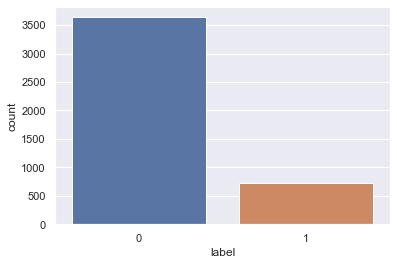

Percent of 0 label: 83.21%
Percent of 1 label: 16.79%


In [12]:
sns.set_theme(style='darkgrid')
sns.countplot(x='label', data=data)
plt.show()

num_label_0 = (data.label == 0).sum()
num_label_1 = (data.label == 1).sum()
num_label = len(data)
print(f'Percent of 0 label: {round(num_label_0/num_label * 100,2)}%')
print(f'Percent of 1 label: {round(num_label_1/num_label * 100,2)}%')

In [13]:
from utils import *

In [14]:
# check Dtype of num_like_post
content = []
for cont in data.num_like_post.unique():
    try:
        int(float(cont))
    except:
        content.append(cont)
print(content)

[nan, 'unknown', ' Solskjaer h·∫° knock-out Guardiola', ' Ngang nhi√™n chi·∫øm d·ª•ng ƒë·∫•t d·ª± √°n h·ªì Y√™n S·ªü l√†m b√£i xe t·∫£i...l√† nh·ªØng tin t·ª©c kinh t·∫ø n√≥ng nh·∫•t 24h qua.', '54 like', ' K·∫øt qu·∫£ phi√™n x·ª≠ ƒë·∫ßu ti√™n c·∫£nh s√°t M·ªπ gh√¨ ch·∫øt George Floyd... l√† nh·ªØng tin t·ª©c qu·ªëc t·∫ø ƒë√°ng ch√∫ √Ω ng√†y 9.6.', ' Th·∫ø gi·ªõi ƒë·∫©y nhanh t·ªëc ƒë·ªô ph√°t tri·ªÉn vaccine ng·ª´a COVID-19 l√† nh·ªØng tin t·ª©c m·ªõi nh·∫•t trong b·∫£n tin M·ªõi nh·∫•t d·ªãch COVID-19 c·ªßa B√°o Lao ƒê·ªông ng√†y 17.3.']


In [15]:
# what is happend on num_like_post?
result = []
for i in range(len(content)):
    temp = data[data.num_like_post == content[i]].reset_index()
    result.append(temp)
print(len(result))

7


In [16]:
print(result[0])

Empty DataFrame
Columns: [index, id, user_name, post_message, timestamp_post, num_like_post, num_comment_post, num_share_post, label]
Index: []


In [17]:
pd.set_option('display.max_rows', None)
result[1]

index    id                         user_name  \
0      35    36  fe8176d5bc081419f9b08e195525c131   
1      77    78  45d80e8d62eac8e3f28a8c822fab002d   
2     177   178  0adfdeb881147078b0c50354193d67dd   
3     285   286  6d46f2b04842bb2221e493968cd05ca4   
4     637   638  17fdafcfe5348b4c35f01f62c403e68c   
5     702   703  e99c6c2cc55c5ea0440f083cf49b3d15   
6     782   783  7c14dfd9cc4c03990ed7343651a06c85   
7     906   907  b88254b2119a7ab65818a6f8401b82fa   
8    1151  1152  4e715ea047ac025ed59d5827ff24ac65   
9    1307  1308  24e37b98630b5ba7668716f65787f16c   
10   1324  1325  2dbc60a8aaad90d024215b2e7f5f3db0   
11   1417  1418  660b7825ef56a2b259c985a181595dfa   
12   1534  1535  86ea56b9db67001328385570bb81f695   
13   1557  1558  100500cfa77df6f08bb9a1b71a457dc3   
14   1797  1798  095f07a3b83a6ea4b7a8fb0ff2721e6f   
15   1827  1828  31b238efdf490a298b83e413c8b8e2e4   
16   1855  1856  4c3cd6a61c27e4720641a62f6ae22949   
17   1961  1962  5d86d93b392d92edf2088635d29483e1   
18   2073  2074  e47886370c56063ba24907d0ebd252e7   
19   2162  2163  3832dfa4be9edb8b776fda20014fca13   
20   2195  2196  9678eb9c71190fc0b57d9266ae7ff5bc   
21   2198  2199  68d174bb739151ea2d308cc8b3732aa4   
22   2215  2216  6d0db64a6e385cf7fb9b66f1c55f18dd   
23   2305  2306  000135ede8e9440c45ee84ffc1e5c430   
24   2323  2324  ba9b983d95d3d4791dbc7350fdebaf9e   
25   2326  2327  96144bbb7afff0737a88773dac7ee4ca   
26   2349  2350  a527ec8d90e6e6fe4006d6276834523c   
27   2351  2352  2007e8acfdb13b766efdc9e1b46fb4f7   
28   2411  2412  dad40d869340443494b4337aad685984   
29   2445  2446  c4e6de7b0f9407211d9f469b2c797d64   
30   2470  2471  f3ddaf93909cf213198a054948b93a4b   
31   2497  2498  c0a7dc5bf127d01020f6c7f91ba3f689   
32   2530  2531  1bcb86f2d4f79ccc6afdba9d48af85d4   
33   2561  2562  ef6e4d35915596b28782edffbb4a395f   
34   2564  2565  fa91f55a3dafc25e39ff1687d31423f2   
35   2637  2638  c543472dc0632612a27d6feab784d462   
36   2706  2707  59d36b455b93eb3c62c0e8387f86e9a2   
37   2711  2712  e17843f01e3eb99b2df1db64e14a3794   
38   2726  2727  bd612a8c9a208033cd7344cba730800a   
39   2742  2743  1a875c70cead169a79ab4e1ebf362e51   
40   2919  2920  6039201545b96b1170abb2c79cb28c9d   
41   2962  2963  4f52b22bc4636e67963428765b21c795   
42   3037  3038  417f8878b0d0edbf7a178a987e848369   
43   3047  3048  e5831f39596651dbcacc4dd1208f5b06   
44   3105  3106  1774d8c5522b1c084f038f24b5a96409   
45   3167  3168  97ba426df7488a3372a8973a5860f2c7   
46   3178  3179  4ede4a4281b6a26ff1db5f3e589b4383   
47   3226  3227  e5c445f09c74d3c044858f6321874c2e   
48   3306  3307  c6cde52e7def0b47faa6b269263c4ea4   
49   3358  3359  6e7401c76ba64a20ea93313a1e571598   
50   3381  3382  88d67d0cdf3664a85ba5c42bd704618e   
51   3545  3546  1798c5f17ffbb44540ad35df94609ac2   
52   3636  3637  0fa198fa09ad25ab7148e0d3b7937626   
53   3701  3702  724023650c72e23e871e6c22354f3b12   
54   3708  3709  b0e6e3ae2a56b29765846b2d12f370cc   
55   3726  3727  c5bd8d47d1b52bde87e6d805ed899d3f   
56   3763  3764  cdb2c1906c3c94eda11893bae12d023a   
57   3877  3878  fc3f2b1ca11ee3c923e005ef9d8eb212   
58   3901  3902  fc4107af786edb367c86b5e8333ebc13   
59   4149  4150  158b4938e2e34f76f8b34c52a02bc663   
60   4215  4216  00e31592dda2b69862316c49d71e2c01   
61   4249  4250  64eb8fe84f9b485967d7334f934a6348   
62   4323  4324  30ba11e2af4156a2a4d6870cdecda3da   
63   4349  4350  b6041ccf83b87019f42bf93281b3b110   
64   4352  4353  0f0873a65abf44d5223d70d6425af33b   

                                         post_message timestamp_post  \
0   Ng∆∞·ªùi m·∫∑t ƒëen mi·ªáng ng·∫≠m 2 qu·∫£ g√¨ ƒë√≥ tay c·∫ßm ƒë...   1575711720.0   
1   M·ªçi ng∆∞·ªùi ra ƒë∆∞·ªùng nh·ªõ ƒëeo kh·∫©u trang nha. ƒê√£ ...   1596949200.0   
2   Ca Ph·∫´u Thu·∫≠t th·∫•t b·∫°i. Ho√†i Linh l√¢m v√†o t√¨nh...   1501295400.0   
3   Ng√†y h√¥m qua gia ƒë√¨nh m√¨nh c√≥ ra ch·ª£ Th·ªõi B√¨nh...   1499075340.0   
4   Danh H√†i Th√∫y Nga Qua ƒê·ªùi ƒê·ªÉ L·∫°i Gia T√†i Tri·ªáu...   1593485100.0   
5  

In [18]:
num_data = pd.read_csv('num_data_del.csv', encoding='utf-8')

num_data.head(10)

id  num_like_post  num_comment_post  num_share_post  label
0   1          19477               378             173      0
1   3             48                 5              19      0
2   4              3                 0               0      0
3   5            775                 0              54      0
4   6              2                 1               0      0
5   7             25                 1               1      0
6   8              6                 0               1      0
7   9              6                 0               0      0
8  10              6                 0               0      0
9  11            170                51              68      1

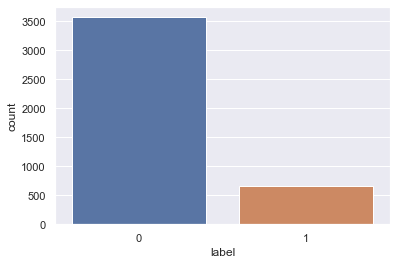

Percent of 0 label: 84.47%
Percent of 1 label: 15.53%


In [19]:
count_plot(num_data)

In [20]:
cols = ['num_like_post', 'num_comment_post', 'num_share_post', 'label']
subnets = num_data[cols]
subnets.corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [21]:
num_data_down = pd.read_csv('num_data_del_down.csv')

print(num_data_down.shape)
num_data_down.head(10)

(1456, 5)


id  num_like_post  num_comment_post  num_share_post  label
0  4341            400                15              79      0
1  1035          40000              1400            2600      0
2  2896             13                 1               0      0
3  3941              6                 0               0      0
4  1805              6                 1               0      0
5  2340             33                 0               2      0
6  4177             29                 5               1      0
7  2073           3500                16            2900      0
8  1106            369                50               7      0
9  3155            135                 1              12      0

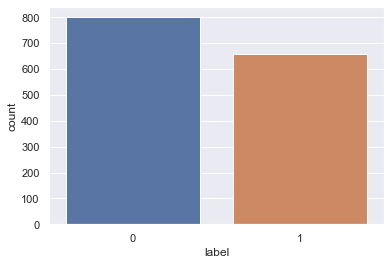

Percent of 0 label: 54.95%
Percent of 1 label: 45.05%


In [22]:
count_plot(num_data_down)

In [23]:
text_data = pd.read_csv('cat_data_del.csv', encoding='utf-8')

print(text_data.shape)
text_data.head(10)

(4224, 3)


id                                       post_message  label
0   1  THƒÇNG C·∫§P B·∫¨C H√ÄM ƒê·ªêI V·ªöI 2 C√ÅN B·ªò, CHI·∫æN S·ª∏ H...      0
1   3  T∆Ø V·∫§N M√ôA THI: C√°ch n·ªôp h·ªì s∆° ƒë·ªÉ tr√∫ng tuy·ªÉn ...      0
2   4  C∆° quan C·∫°nh tranh v√† Th·ªã tr∆∞·ªùng Anh quy·∫øt ƒë·ªãn...      0
3   5  Th√™m 7 ca t·∫°i Qu·∫£ng Nam li√™n quan ƒë·∫øn h√†nh kh√°...      0
4   6  Trong gi·ªù h·ªçc Th·ªÉ d·ª•‚Äåc do th·∫ßy gi√°o Nguy·ªÖn VƒÉn...      0
5   7  Ch·ªß ƒë·∫ßu t∆∞ t·∫°i H√† N·ªôi tung s·∫£n ph·∫©m c√≥ m·ª©c gi√°...      0
6   8  Lu·∫≠t s∆∞ Tr·∫ßn H·ªìng Phong cung c·∫•p t√¨nh ti·∫øt m·ªõi...      0
7   9  H√† Tƒ©nh n·∫±m trong nh√≥m 'nguy c∆° cao' g·ªìm 12 t·ªâ...      0
8  10  Nhi·ªÅu ng∆∞·ªùi cho r·∫±ng, vi·ªác th·ª±c hi·ªán t·ªïng ki·ªÉm...      0
9  11  Trong 1 v·ª• x√¥ x√°t nh·ªè th√¥i, em trai n√†y b·ªã b·∫Øt...      1

In [24]:
for i in range(len(text_data)):
    index = text_data.iat[i,0]
    text = text_data.iat[i,1]
    label = convert_label_to_text(data.iat[i,2])
    print(f'Example {i}, label: {label}, index: {index}', '\n')
    print(text)
    print('*'*100)

H√†n Qu·ªëc ƒë∆∞a 720 ng∆∞·ªùi d√¢n H√†n Qu·ªëc t·ª´ V≈© H√°n tr·ªü v·ªÅ, trong khi ch√≠nh quy·ªÅn ‚Äúd√¢n ch·ªß‚Äù Nh·∫≠t B·∫£n, M·ªπ b·∫≠n b·ªãu thu ti·ªÅn ng∆∞·ªùi b·ªánh mu·ªën tr·ªü v·ªÅ n∆∞·ªõc th√¨ ch√≠nh ph·ªß Vi·ªát Nam ch·ªâ tuy√™n b·ªë m·ªôt c√¢u ƒë∆°n gi·∫£n ‚Äús·∫µn s√†ng ƒë√≥n b√† con v·ªÅ n∆∞·ªõc‚Äù. Ch√∫ng ta, c≈©ng s·∫µn s√†ng ch√†o ƒë√≥n b√† con, ƒë·ªìng b√†o v·ªÅ n∆∞·ªõc, kh√¥ng g√¨ h∆°n khi nh·ªØng l√∫c kh√≥ khƒÉn, v√≤ng <URL> c·ªßa ng∆∞·ªùi Vi·ªát l·∫°i khi·∫øn cho nh·ªØng ng∆∞·ªùi con xa x·ª© c·∫£m th·∫•y ƒë∆∞·ª£c b·∫£o v·ªá v√† ch·ªü che. H√¥m qua, B·ªô T∆∞ l·ªánh Th·ªß ƒë√¥ cho bi·∫øt ƒë√£ chu·∫©n b·ªã ƒë·∫ßy ƒë·ªß c∆° s·ªü v·∫≠t ch·∫•t ƒë·ªÉ ƒë√≥n 950 ng∆∞·ªùi t·ª´ v√πng d·ªãch tr·ªü v·ªÅ trong 14 ng√†y t·∫°i c√°c ƒë·ªãa ƒëi·ªÉm qu√¢n ƒë·ªôi t·∫°i S∆°n T√¢y v√† Xu√¢n Mai. Kh√¥ng c√≥ ng∆∞·ªùi bi·ªÉu t√¨nh, c≈©ng ch·∫≥ng c√≥ m√°y k√©o, ch·∫≥ng c√≥ bi·ªÉu ng·ªØ... n√†o ngƒÉn nh·ªØng ng∆∞·ªùi Vi·ªát h·ªìi h∆∞∆°ng v·ªÅ c·ªôi ngu·ªìn l√∫c kh√≥ khƒÉn c·∫£. Trong khi ƒ

In [25]:
for i in range(len(text_data)):
    index = text_data.iat[i,0]
    text = text_data.iat[i,1]
    label = convert_label_to_text(data.iat[i,2])
    print(f'Example {i}, label: {label}, index: {index}', '\n')
    print(text)
    print('*'*100)

H√†n Qu·ªëc ƒë∆∞a 720 ng∆∞·ªùi d√¢n H√†n Qu·ªëc t·ª´ V≈© H√°n tr·ªü v·ªÅ, trong khi ch√≠nh quy·ªÅn ‚Äúd√¢n ch·ªß‚Äù Nh·∫≠t B·∫£n, M·ªπ b·∫≠n b·ªãu thu ti·ªÅn ng∆∞·ªùi b·ªánh mu·ªën tr·ªü v·ªÅ n∆∞·ªõc th√¨ ch√≠nh ph·ªß Vi·ªát Nam ch·ªâ tuy√™n b·ªë m·ªôt c√¢u ƒë∆°n gi·∫£n ‚Äús·∫µn s√†ng ƒë√≥n b√† con v·ªÅ n∆∞·ªõc‚Äù. Ch√∫ng ta, c≈©ng s·∫µn s√†ng ch√†o ƒë√≥n b√† con, ƒë·ªìng b√†o v·ªÅ n∆∞·ªõc, kh√¥ng g√¨ h∆°n khi nh·ªØng l√∫c kh√≥ khƒÉn, v√≤ng <URL> c·ªßa ng∆∞·ªùi Vi·ªát l·∫°i khi·∫øn cho nh·ªØng ng∆∞·ªùi con xa x·ª© c·∫£m th·∫•y ƒë∆∞·ª£c b·∫£o v·ªá v√† ch·ªü che. H√¥m qua, B·ªô T∆∞ l·ªánh Th·ªß ƒë√¥ cho bi·∫øt ƒë√£ chu·∫©n b·ªã ƒë·∫ßy ƒë·ªß c∆° s·ªü v·∫≠t ch·∫•t ƒë·ªÉ ƒë√≥n 950 ng∆∞·ªùi t·ª´ v√πng d·ªãch tr·ªü v·ªÅ trong 14 ng√†y t·∫°i c√°c ƒë·ªãa ƒëi·ªÉm qu√¢n ƒë·ªôi t·∫°i S∆°n T√¢y v√† Xu√¢n Mai. Kh√¥ng c√≥ ng∆∞·ªùi bi·ªÉu t√¨nh, c≈©ng ch·∫≥ng c√≥ m√°y k√©o, ch·∫≥ng c√≥ bi·ªÉu ng·ªØ... n√†o ngƒÉn nh·ªØng ng∆∞·ªùi Vi·ªát h·ªìi h∆∞∆°ng v·ªÅ c·ªôi ngu·ªìn l√∫c kh√≥ khƒÉn c·∫£. Trong khi ƒ

In [26]:
cat_data = pd.read_csv('cat_data_del_down_pre.csv', encoding='utf8')

print(cat_data.shape)
cat_data.head(20)

(1456, 4)


id                                       post_message  label  \
0    448  Ho√° ƒë∆°n ti·ªÅn ƒëi·ªán tƒÉng "s·ªëc": K·∫Ω h·ªü trong vi·ªác...      0   
1      7  Ch·ªß ƒë·∫ßu t∆∞ t·∫°i H√† N·ªôi tung s·∫£n ph·∫©m c√≥ m·ª©c gi√°...      0   
2   1278  C√¥ng an huy·ªán Kbang ra quy·∫øt ƒë·ªãnh t·∫°m gi·ªØ h√¨nh...      0   
3   2745  Qu√° th∆∞∆°ng t√¢m\nPh√≥ Ch·ªß t·ªãch UBND qu·∫≠n B√¨nh T√¢...      0   
4   2009  C√¥ng ty TNHH Th∆∞∆°ng m·∫°i Th·ªßy s·∫£n Vƒ©nh Long ƒë√£ ...      0   
5   2454  ƒê·∫æN 6H S√ÅNG NAY: CH∆ØA GHI NH·∫¨N CA M·∫ÆC M·ªöI\n\nN...      0   
6   1277  B·ªë ∆°i y√™n ngh·ªâ, con kh√¥ng v·ªÅ ƒë∆∞·ª£c!\n\nNg∆∞·ªùi l√≠...      0   
7   2452  Xu√¢n L·ªôc th·∫•t th·ªß. C√°c tuy·∫øn ph√≤ng ng·ª± t·ª´ xa ƒë...      0   
8   1460        B·∫•t ng·ªù th√∫ v·ªã, m·ªôt nƒÉm c√≥ 3 ng√†y Valentine      0   
9   3452  C√πng v·ªõi qu√° tr√¨nh ƒëi·ªÅu tra c·ªßa C√¥ng an t·ªânh B...      0   
10  4096  V√¨ sao l·∫°i c√≥ con s·ªë 400.000 t·∫•n g·∫°o m√† kh√¥ng ...      0   
11  2951  Trung Qu·ªëc cho ph√©p th·ª≠ nghi·ªám l√¢m s√†ng tr√™n n...      0   
12  2265  ƒê∆∞·ª£c bi·∫øt, ƒë√¢y kh√¥ng ph·∫£i l√† d·ª± √°n duy nh·∫•t do...      0   
13  2881  Xung quanh ca nhi·ªÖm Covid-19 th·ª© 17 t·∫°i Vi·ªát N...      0   
14  1921  Sau 2 nƒÉm c√≥ ƒë∆°n t·ªë c√°o ƒë·ªëi v·ªõi lu·∫≠t s∆∞ Nguy·ªÖn...      0   
15  4048  Trong c√°c ng√†y ngh·ªâ l·ªÖ 2 v√† 3.5, th·∫ßy c√¥ ·ªü H√† ...      0   
16  2663  Ch∆°i th√¥i ai ng·ªù qu√° tr·ªõn qu√° ha\n\n[<URL>](<U...      0   
17  2129  KH·∫®N: Th·ªß t∆∞·ªõng Nguy·ªÖn Xu√¢n Ph√∫c v·ª´a ban h√†nh ...      0   
18   267  G·ª£i √Ω th·ª±c ƒë∆°n b·ªØa c∆°m gia ƒë√¨nh h√†ng ng√†y nh√©,...      0   
19   121  Th·ª© tr∆∞·ªüng B·ªô Y t·∫ø Nguy·ªÖn Tr∆∞·ªùng S∆°n cho bi·∫øt ...      0   

                               post_message_preproced  
0   ho√°_ƒë∆°n ti·ªÅn ƒëi·ªán s·ªëc k·∫Ω h·ªü ghi ƒëi·ªán vi·ªát_nam ...  
1   ch·ªß ƒë·∫ßu_t∆∞ h√†_n·ªôi tung s·∫£n_ph·∫©m gi√° t·ª∑ ƒë·ªìng ƒë√≥...  
2   c√¥ng_an huy·ªán kbang quy·∫øt_ƒë·ªãnh t·∫°m h√¨nh_s·ª± ph·∫°...  
3   th∆∞∆°ng_t√¢m ph√≥ ch·ªß_t·ªãch ubnd b√¨nh_t√¢n tphcm n·∫°...  
4   c√¥ng_ty tnh th∆∞∆°ng_m·∫°i thu·ª∑_s·∫£n vƒ©nh_long l·ª£i_...  
5   ghi_nh·∫≠n ca m·∫Øc tr√¥i vi·ªát_nam ghi_nh·∫≠n ca m·∫Øc ...  
6   b·ªë y√™n_ngh·ªâ l√≠nh qu√¢n_h√†m xanh ƒë√°nh d·ªãch covid...  
7   xu√¢n_l·ªôc th·∫•t_th·ªß tuy·∫øn ph√≤ng_ng·ª± ph√° v·ª° ƒë·ªãch ...  
8                                    th√∫_v·ªã valentine  
9   ƒëi·ªÅu_tra c√¥ng_an t·ªânh b√¨nh_d∆∞∆°ng v·ª• √°n h√†nh_vi...  
10  con_s·ªë g·∫°o c√¥ng_th∆∞∆°ng d·ª±_tr·ªØ kg g·∫°o g·∫°o ti√™u_...  
11  trung_qu·ªëc cho_ph√©p th·ª≠_nghi·ªám l√¢m_s√†ng vacine...  
12  d·ª±_√°n duy_nh·∫•t t·ªïng_c√¥ng_ty kho√°ng_s·∫£n th∆∞∆°ng_...  
13  xung_quanh ca nhi·ªÖm covid vi·ªát_nam virus coron...  
14  ƒë∆°n t·ªë_c√°o lu·∫≠t_s∆∞ nguy·ªÖn_vƒÉn chi·∫øn ch·ªß_nhi·ªám ...  
15  ngh·ªâ l·ªÖ th·∫ßy_c√¥ h√†_n·ªôi b·∫≠n_r·ªôn tr∆∞·ªùng tham_gia...  
16                          ai_ng·ªù qu√°_tr·ªõn ha urlurl  
17  kh·∫©n th·ªß_t∆∞·ªõng nguy·ªÖn_xu√¢n ph√∫c ban_h√†nh ch·ªâ_t...  
18  g·ª£i th·ª±c_ƒë∆°n b·ªØa c∆°m gia_ƒë√¨nh h√†ng ƒë∆°n_gi·∫£n ng...  
19  th·ª©_tr∆∞·ªüng t·∫ø nguy·ªÖn_tr∆∞·ªùng_s∆°n b√°c_sƒ© ƒëi·ªÅu_d∆∞...

In [27]:
for i in range(150):
    text = cat_data.post_message_preproced[i]
    print(text)
    print('*'*100)

ho√°_ƒë∆°n ti·ªÅn ƒëi·ªán s·ªëc k·∫Ω h·ªü ghi ƒëi·ªán vi·ªát_nam ho√†n_th√†nh xu·∫•t_kh·∫©u l√¥ v·∫£i_thi·ªÅu nh·∫≠t_b·∫£n an_to√†n ch√¢n n√¥ng_d√¢n t·∫≠n c√°nh ƒë·ªìng h·ªÖ xu·ªëng_gi·ªëng ch·∫øt tin_t·ª©c kinh_t·∫ø
****************************************************************************************************
ch·ªß ƒë·∫ßu_t∆∞ h√†_n·ªôi tung s·∫£n_ph·∫©m gi√° t·ª∑ ƒë·ªìng ƒë√≥n b·∫Øt mua gia_ƒë√¨nh tr·∫ª nhu_c·∫ßu th·ª±c skyoasis
****************************************************************************************************
c√¥ng_an huy·ªán kbang quy·∫øt_ƒë·ªãnh t·∫°m h√¨nh_s·ª± ph·∫°m ng·ªçc sinh h√†nh_vi hi·∫øp_d√¢m
****************************************************************************************************
th∆∞∆°ng_t√¢m ph√≥ ch·ªß_t·ªãch ubnd b√¨nh_t√¢n tphcm n·∫°n_nh√¢n v·ª• nghi ph√≥ng_ho·∫£ ch·∫øt ph∆∞·ªùng b√¨nh tr·ªã ƒë√¥ng ch√°u v·ª• nghi ph√≥ng_ho·∫£ ch·∫øt ph√≤ng tr·ªç ƒë∆∞·ªùng ph∆∞·ªùng b√¨nh tr·ªã ƒë√¥ng trao_ƒë·ªïi ph√≥ng_vi√™n nguy·ªÖn gia th√°i_b√¨nh

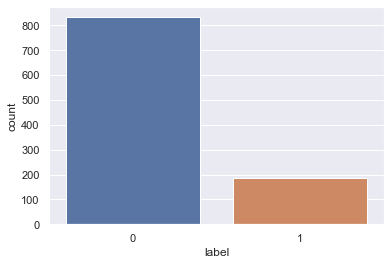

Percent of 0 label: 81.67%
Percent of 1 label: 18.33%


In [9]:
num_test = pd.read_csv('test.csv')
count_plot(num_test)

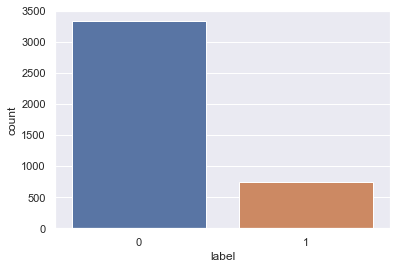

Percent of 1 label: 18.28%
Percent of 0 label: 81.72%


In [10]:
train = pd.read_csv('train.csv', encoding='utf8')
count_plot(train)

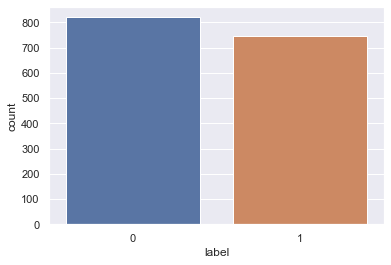

Percent of 0 label: 52.36%
Percent of 1 label: 47.64%


In [11]:
data_balance = pd.read_csv('data_balance.csv')
count_plot(data_balance)

In [5]:
data = pd.read_csv('./datasets/combined_datasets.csv')

data

Unnamed: 0   id                         user_name  \
0              0    1  389c669730cb6c54314a46be785cea42   
1              1    2  775baa6d037b6d359b229a656eaeaf08   
2              2    3  b9f3394d2aff86d85974f5040c401f08   
3              3    4  808e278b22ec6b96f2faf7447d10cd8e   
4              4    5  f81bdd6d8be4c5f64bb664214e47aced   
...          ...  ...                               ...   
5167         795  795               2490795936720330752   
5168         796  796               1846872478075934976   
5169         797  797              -4723502351165939712   
5170         798  798               7717037201428829184   
5171         799  799              -8318346087637567488   

                                           post_message timestamp_post  \
0     THƒÇNG C·∫§P B·∫¨C H√ÄM ƒê·ªêI V·ªöI 2 C√ÅN B·ªò, CHI·∫æN S·ª∏ H...     1585945439   
1                                                 <URL>   1588939166.0   
2     T∆Ø V·∫§N M√ôA THI: C√°ch n·ªôp h·ªì s∆° ƒë·ªÉ tr√∫ng tuy·ªÉn ...     1591405213   
3     C∆° quan C·∫°nh tranh v√† Th·ªã tr∆∞·ªùng Anh quy·∫øt ƒë·ªãn...     1592023613   
4     Th√™m 7 ca t·∫°i Qu·∫£ng Nam li√™n quan ƒë·∫øn h√†nh kh√°...     1583737358   
...                                                 ...            ...   
5167  ƒê·ªãnh c∆∞ g·∫ßn 60 nƒÉm, trong ƒë√≥ 20 nƒÉm b·ªã "treo" ...   1587536506.0   
5168  Lo·∫°n n√£o qu√°\n\nTheo b√°o ƒëi·ªán t·ª≠ Giao th√¥ng, p...   1589971521.0   
5169  https://m.baophapluat.vn/ban-doc/vu-an-tranh-c...   1592534180.0   
5170  C·ª•c B·∫£o v·ªá th·ª±c v·∫≠t cho r·∫±ng, ƒë·ªÅ xu·∫•t t·∫°m th·ªùi...   1591227477.0   
5171  Kh√¥ng r√µ 2 xe ƒëi v·ªõi t·ªëc ƒë·ªô bao nhi√™u ƒë·ªÉ x·∫£y r...   1592277768.0   

     num_like_post num_comment_post num_share_post  label  
0            19477              378          173.0      0  
1               11                5              3      0  
2               48                5           19.0      0  
3                3                0            0.0      0  
4              775                0           54.0      0  
...            ...              ...            ...    ...  
5167           NaN                0            NaN      0  
5168            43               24              3      0  
5169             3                0            NaN      0  
5170            13                2            NaN      0  
5171             9                0              1      0  

[5172 rows x 9 columns]

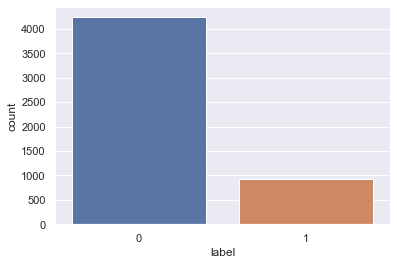

Percent of 0 label: 81.94%
Percent of 1 label: 18.06%


In [6]:
count_plot(data)

In [7]:
data = data.drop(['timestamp_post', 'Unnamed: 0'], axis=1).reset_index(drop=True)

In [8]:
data

id                         user_name  \
0       1  389c669730cb6c54314a46be785cea42   
1       2  775baa6d037b6d359b229a656eaeaf08   
2       3  b9f3394d2aff86d85974f5040c401f08   
3       4  808e278b22ec6b96f2faf7447d10cd8e   
4       5  f81bdd6d8be4c5f64bb664214e47aced   
...   ...                               ...   
5167  795               2490795936720330752   
5168  796               1846872478075934976   
5169  797              -4723502351165939712   
5170  798               7717037201428829184   
5171  799              -8318346087637567488   

                                           post_message num_like_post  \
0     THƒÇNG C·∫§P B·∫¨C H√ÄM ƒê·ªêI V·ªöI 2 C√ÅN B·ªò, CHI·∫æN S·ª∏ H...         19477   
1                                                 <URL>            11   
2     T∆Ø V·∫§N M√ôA THI: C√°ch n·ªôp h·ªì s∆° ƒë·ªÉ tr√∫ng tuy·ªÉn ...            48   
3     C∆° quan C·∫°nh tranh v√† Th·ªã tr∆∞·ªùng Anh quy·∫øt ƒë·ªãn...             3   
4     Th√™m 7 ca t·∫°i Qu·∫£ng Nam li√™n quan ƒë·∫øn h√†nh kh√°...           775   
...                                                 ...           ...   
5167  ƒê·ªãnh c∆∞ g·∫ßn 60 nƒÉm, trong ƒë√≥ 20 nƒÉm b·ªã "treo" ...           NaN   
5168  Lo·∫°n n√£o qu√°\n\nTheo b√°o ƒëi·ªán t·ª≠ Giao th√¥ng, p...            43   
5169  https://m.baophapluat.vn/ban-doc/vu-an-tranh-c...             3   
5170  C·ª•c B·∫£o v·ªá th·ª±c v·∫≠t cho r·∫±ng, ƒë·ªÅ xu·∫•t t·∫°m th·ªùi...            13   
5171  Kh√¥ng r√µ 2 xe ƒëi v·ªõi t·ªëc ƒë·ªô bao nhi√™u ƒë·ªÉ x·∫£y r...             9   

     num_comment_post num_share_post  label  
0                 378          173.0      0  
1                   5              3      0  
2                   5           19.0      0  
3                   0            0.0      0  
4                   0           54.0      0  
...               ...            ...    ...  
5167                0            NaN      0  
5168               24              3      0  
5169                0            NaN      0  
5170                2            NaN      0  
5171                0              1      0  

[5172 rows x 7 columns]